In [1]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 7]

In [24]:
df=pd.read_csv("data.csv")

In [25]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [26]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [28]:
df.mean()

Unnamed: 0                    9103.000000
ID                          214298.338606
Age                             25.122206
Overall                         66.238699
Potential                       71.307299
Special                       1597.809908
International Reputation         1.113222
Weak Foot                        2.947299
Skill Moves                      2.361308
Jersey Number                   19.546096
Crossing                        49.734181
Finishing                       45.550911
HeadingAccuracy                 52.298144
ShortPassing                    58.686712
Volleys                         42.909026
Dribbling                       55.371001
Curve                           47.170824
FKAccuracy                      42.863153
LongPassing                     52.711933
BallControl                     58.369459
Acceleration                    64.614076
SprintSpeed                     64.726967
Agility                         63.503607
Reactions                       61

In [29]:
df.var()

Unnamed: 0                  2.762609e+07
ID                          8.979159e+08
Age                         2.180836e+01
Overall                     4.773331e+01
Potential                   3.765658e+01
Special                     7.430314e+04
International Reputation    1.552602e-01
Weak Foot                   4.362025e-01
Skill Moves                 5.717841e-01
Jersey Number               2.543312e+02
Crossing                    3.372557e+02
Finishing                   3.812577e+02
HeadingAccuracy             3.020612e+02
ShortPassing                2.160752e+02
Volleys                     3.130921e+02
Dribbling                   3.576021e+02
Curve                       3.383857e+02
FKAccuracy                  3.055072e+02
LongPassing                 2.349436e+02
BallControl                 2.784425e+02
Acceleration                2.228386e+02
SprintSpeed                 2.146211e+02
Agility                     2.180362e+02
Reactions                   8.118847e+01
Balance         

In [30]:
df.skew()

Unnamed: 0                  0.000000
ID                         -2.267983
Age                         0.391764
Overall                     0.067185
Potential                   0.266154
Special                    -0.705805
International Reputation    4.060420
Weak Foot                   0.138402
Skill Moves                 0.149898
Jersey Number               2.185483
Crossing                   -0.594480
Finishing                  -0.300885
HeadingAccuracy            -0.885128
ShortPassing               -1.100316
Volleys                    -0.148651
Dribbling                  -1.084200
Curve                      -0.238195
FKAccuracy                  0.102117
LongPassing                -0.595640
BallControl                -1.267863
Acceleration               -0.815301
SprintSpeed                -0.828586
Agility                    -0.599416
Reactions                  -0.114127
Balance                    -0.583272
ShotPower                  -0.680467
Jumping                    -0.454319
S

In [31]:
df.kurtosis()

Unnamed: 0                  -1.200000
ID                           9.609500
Age                         -0.459514
Overall                      0.096569
Potential                    0.035826
Special                      0.338082
International Reputation    18.960976
Weak Foot                    0.657901
Skill Moves                 -0.087602
Jersey Number                7.135316
Crossing                    -0.543306
Finishing                   -0.972614
HeadingAccuracy              0.292507
ShortPassing                 0.788778
Volleys                     -0.716198
Dribbling                    0.337456
Curve                       -0.743967
FKAccuracy                  -0.718342
LongPassing                 -0.376542
BallControl                  1.030129
Acceleration                 0.469644
SprintSpeed                  0.536190
Agility                     -0.068599
Reactions                    0.057029
Balance                      0.093969
ShotPower                   -0.335175
Jumping     

In [32]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [33]:
df.min()

Unnamed: 0                                                               0
ID                                                                      16
Name                                                              A. Abang
Age                                                                     16
Photo                       https://cdn.sofifa.org/players/4/19/100803.png
Nationality                                                    Afghanistan
Flag                                    https://cdn.sofifa.org/flags/1.png
Overall                                                                 46
Potential                                                               48
Club Logo                             https://cdn.sofifa.org/flags/103.png
Value                                                                   €0
Wage                                                                    €0
Special                                                                731
International Reputation 

In [34]:
df.max()

Unnamed: 0                                                         18206
ID                                                                246620
Name                                                       Óscar Whalley
Age                                                                   45
Photo                       https://cdn.sofifa.org/players/4/19/9833.png
Nationality                                                     Zimbabwe
Flag                                 https://cdn.sofifa.org/flags/99.png
Overall                                                               94
Potential                                                             95
Club Logo                   https://cdn.sofifa.org/teams/2/light/983.png
Value                                                                €9M
Wage                                                                 €9K
Special                                                             2346
International Reputation                           

In [35]:
df.median()

Unnamed: 0                    9103.0
ID                          221759.0
Age                             25.0
Overall                         66.0
Potential                       71.0
Special                       1635.0
International Reputation         1.0
Weak Foot                        3.0
Skill Moves                      2.0
Jersey Number                   17.0
Crossing                        54.0
Finishing                       49.0
HeadingAccuracy                 56.0
ShortPassing                    62.0
Volleys                         44.0
Dribbling                       61.0
Curve                           48.0
FKAccuracy                      41.0
LongPassing                     56.0
BallControl                     63.0
Acceleration                    67.0
SprintSpeed                     67.0
Agility                         66.0
Reactions                       62.0
Balance                         66.0
ShotPower                       59.0
Jumping                         66.0
S

In [36]:
df.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


In [38]:
import seaborn as sns

<AxesSubplot:>

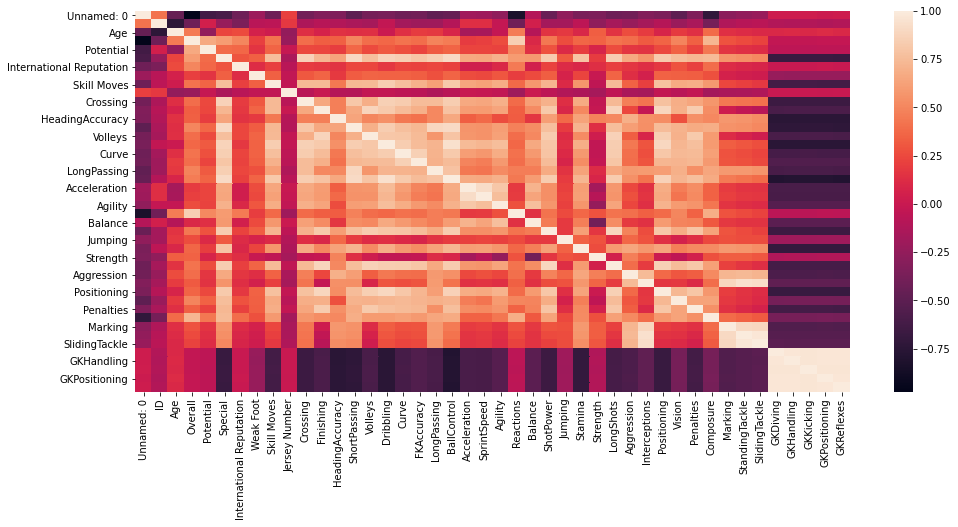

In [40]:
sns.heatmap(df.corr())

<AxesSubplot:>

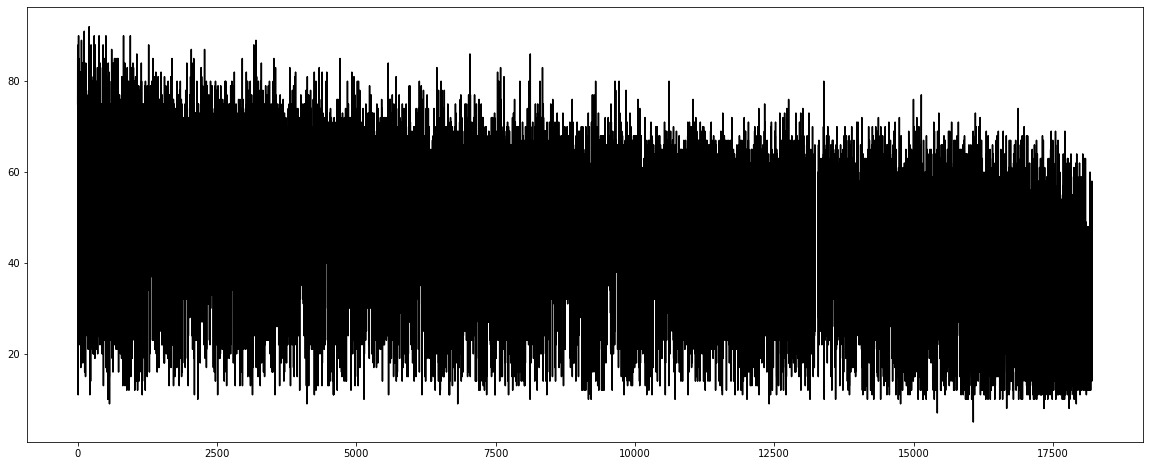

In [47]:
df['Penalties'].plot(figsize=(20, 8), color='black')

<AxesSubplot:xlabel='Balance', ylabel='Strength'>

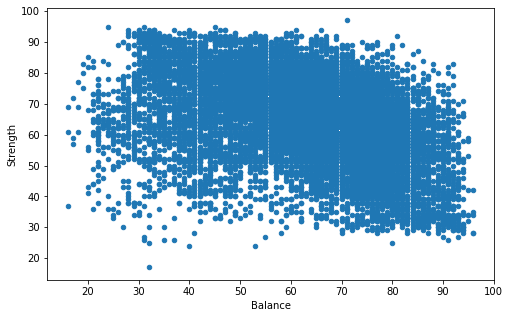

In [51]:
df.plot.scatter('Balance', 'Strength', figsize=(8, 5))

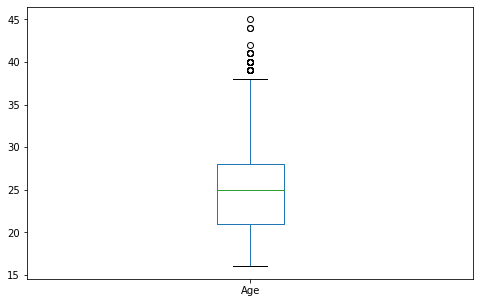

In [52]:
df['Age'].plot.box(figsize=(8, 5));

<AxesSubplot:>

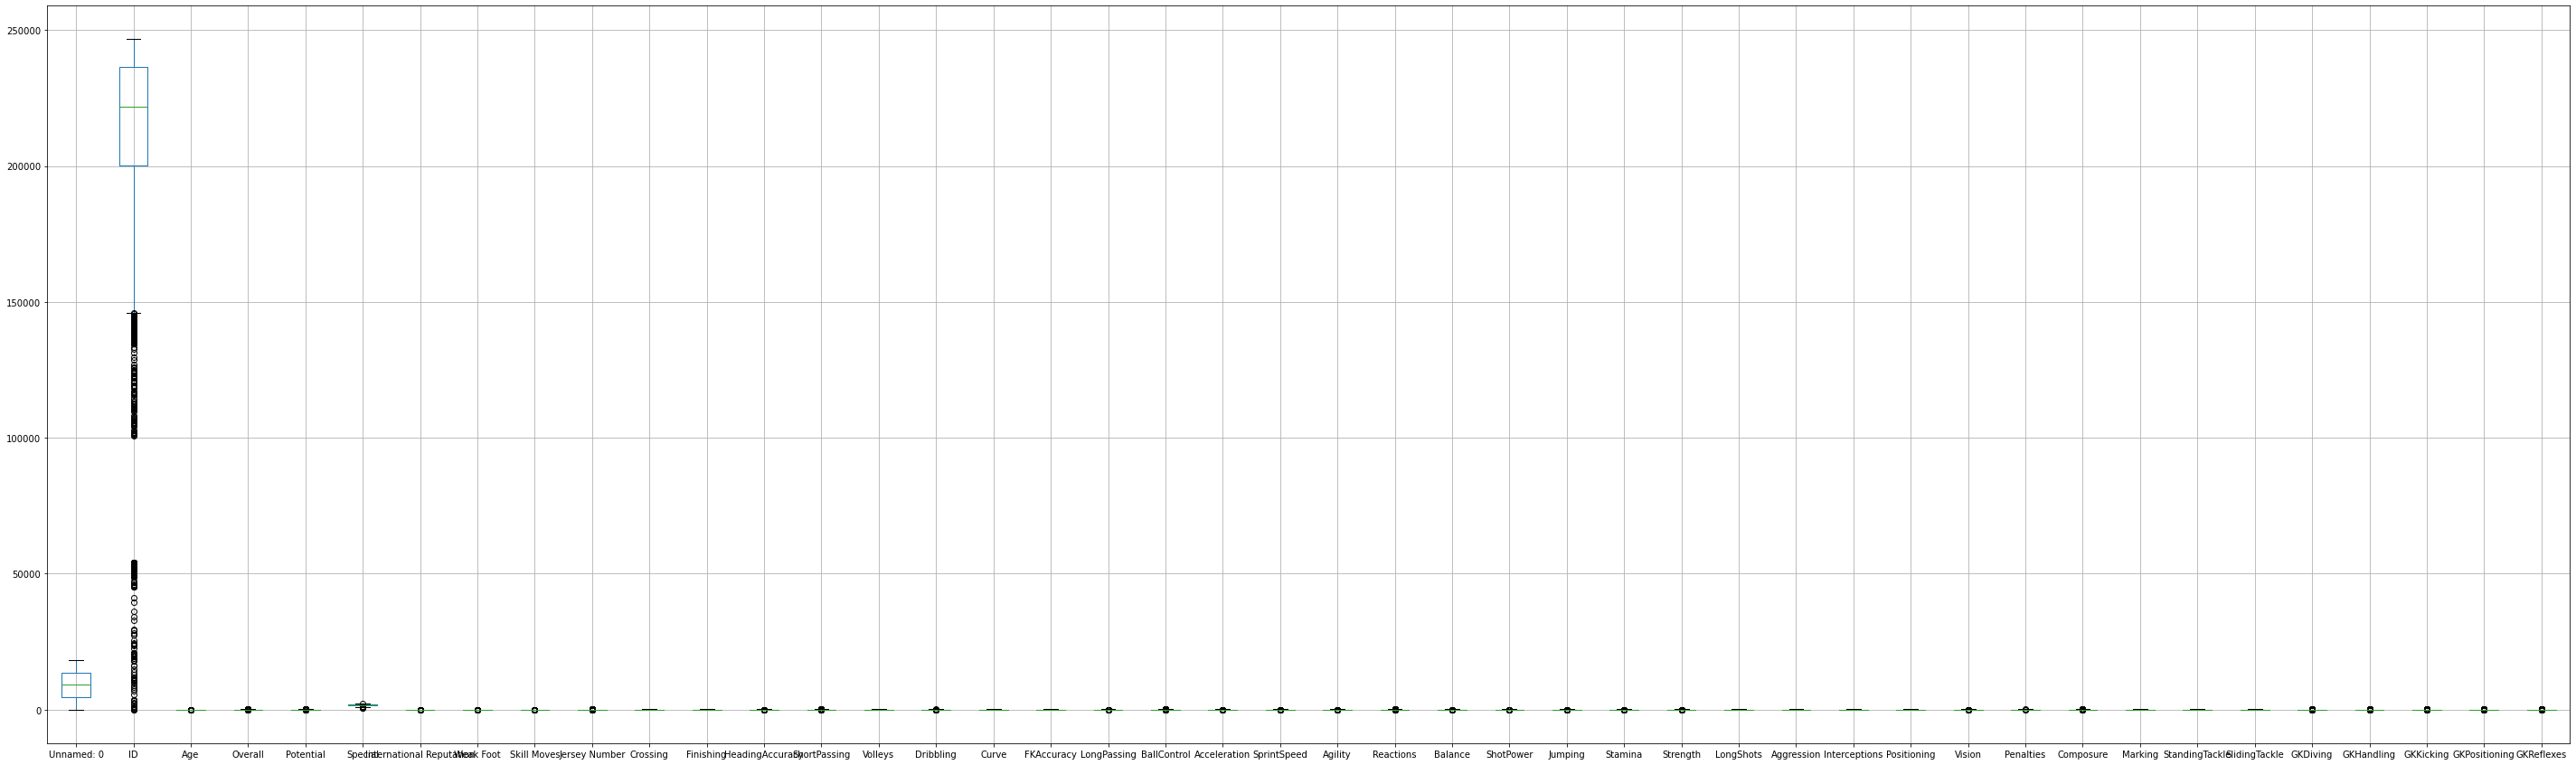

In [61]:
df.boxplot(figsize=(50, 15)) # or df.plot.box()

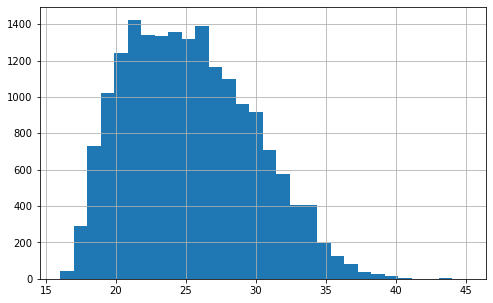

In [54]:
df['Age'].hist(bins=30, figsize=(8, 5)); # we can specify the number of bins

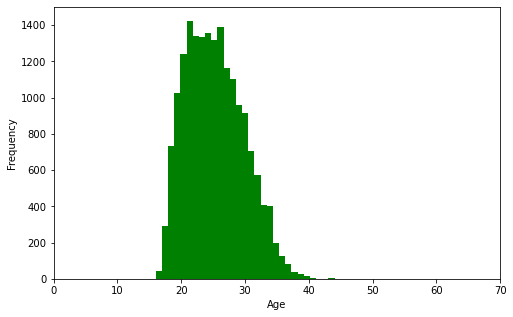

In [57]:
ax = df['Age'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 70) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 1500); # limiting display range to 0-1500 for the y-axis

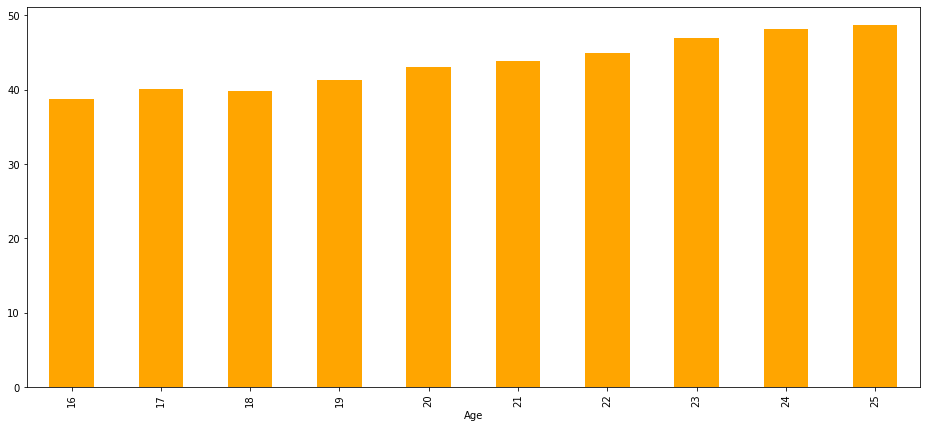

In [59]:
df_avg_BP = df.groupby('Age')['Curve'].mean()
df_avg_BP[:10].plot.bar(color='orange');

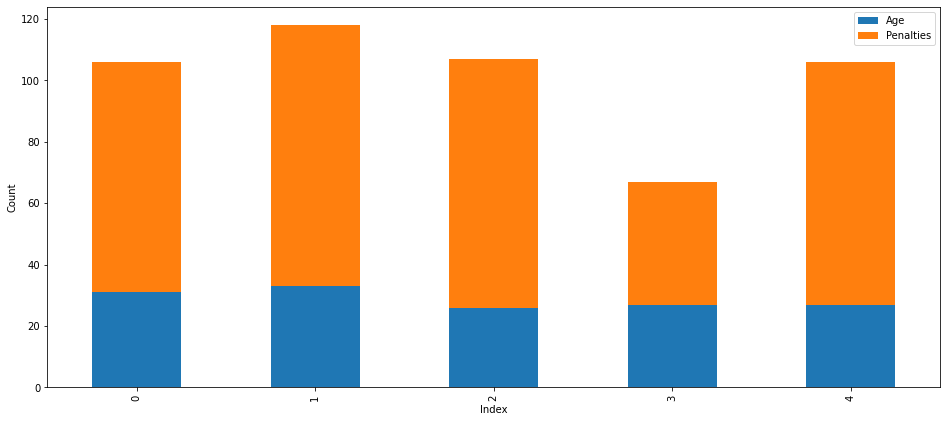

In [64]:
# To stack values from multiple columns
ax = df[['Age', 'Penalties']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

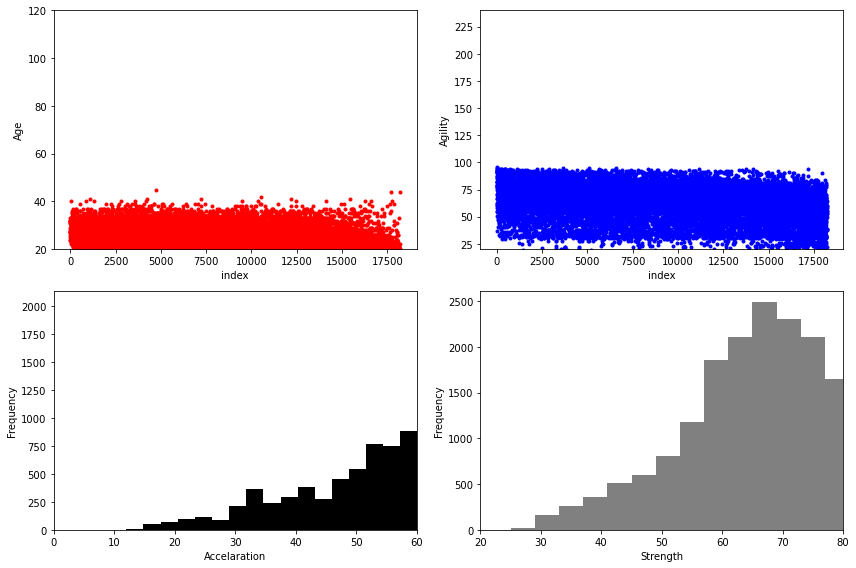

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['Age'].plot(ax = axes[0][0], style='.', color='red') # top left
df['Agility'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['Acceleration'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['Strength'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')
axes[1][0].set_xlabel('Accelaration')
axes[1][1].set_xlabel('Strength')

axes[0][0].set_ylabel('Age')
axes[0][1].set_ylabel('Agility')

axes[0][0].set_ylim(20, 120)
axes[0][1].set_ylim(20, 240)

axes[1][0].set_xlim(0, 60)
axes[1][1].set_xlim(20, 80)

fig.tight_layout()